In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import spacv
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
import pysal as ps

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.7.2dev-CAPI-1.11.2 0) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from spacv.grid_builder import *

In [3]:
df = gpd.read_file('/opt/conda/lib/python3.7/site-packages/libpysal/examples/baltim/baltim.shp')

In [4]:
XYs = df['geometry']
X = df[['NROOM', 'DWELL', 'NBATH']]
y = df['PATIO']

In [5]:
model = LinearRegression(fit_intercept=True)

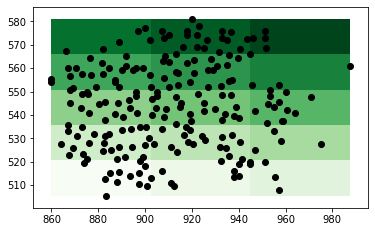

In [8]:
f, ax = plt.subplots(1)
blocks(df, tiles_x=3, tiles_y=5, method='unique').plot(column='grid_id', cmap='Greens',ax=ax)
df.plot(ax=ax, color='black')

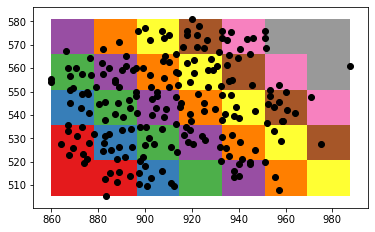

In [9]:
f, ax = plt.subplots(1)
blocks(df, 'systematic', tiles_x=7, tiles_y=5, direction='anti').plot(column='grid_id', cmap='Set1', ax=ax)
df.plot(ax=ax, color='black')

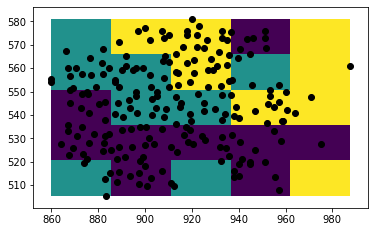

In [10]:
f, ax = plt.subplots(1)
blocks(df, 'randomized', tiles_x=5, tiles_y=5, n_groups=3).plot(column='grid_id', ax=ax)
df.plot(ax=ax, color='black')

In [76]:
cvaa = HBLOCK(buffer_radius=5)

In [77]:
scores = cross_val_score(model, XYs, X, y, cvaa, mean_squared_error)

In [72]:
     
            
def cross_val_score(
    model,
    coordinates,
    X,
    y,
    cv,
    scoring
):
    # Fallback to (a)spatial CV if None
    if cv is None:
        cv = KFold(shuffle=True, random_state=0, n_splits=5)
    
    X = np.array(X)
    y = np.array(y)
    
    scores = []
    scorer = make_scorer(scoring)
    for train_index, test_index in cv.split(coordinates):
        model.fit(X[train_index], y[train_index])
        
        # generalise this
        scores.append(        
            scorer(model, X[test_index], 
                          y[test_index])
        )
    scores = np.asarray(scores)    
    
    return scores

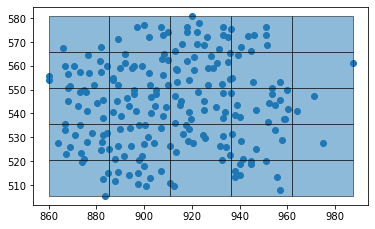

In [62]:
f,ax=plt.subplots(1)
df.plot(ax=ax)
grid.plot(ax=ax, alpha=.5, edgecolor='black')

In [37]:
from sklearn.cluster import KMeans

In [53]:
xys = df.geometry.centroid
xys = np.array(list(map(lambda x : (x.x, x.y), xys)))

k = xys.shape[0]
km = KMeans(n_clusters=k).fit(xys)

In [54]:
df['label'] = km.labels_

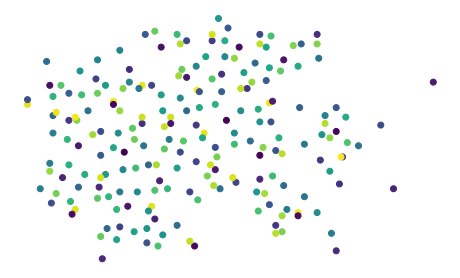

In [55]:
f, ax = plt.subplots(1, figsize=(8,8))
ax.axis('off')
df.plot(column='label', ax=ax)

In [12]:
cv = spacv.SLOO(XYs, radius=50)

scores = spacv.cross_val_score(model, X, y, cv, mean_squared_error)

In [47]:
np.sqrt(
    np.mean(scores)
)

0.3178949253911935